<a href="https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this file on Colab [click here](https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb)

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS 
import spacy
import re
import matplotlib.pyplot as plt

spacy_instance = spacy.load('en_core_web_sm')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sanjaydasgupta/data-mining-of-website-articles/master/articles.csv')
df.shape

(683, 8)

In [3]:
df.head(15)

,Unnamed: 0,datetime,author,author_url,title,url,summary,page_no
0,0,2020-11-05T15:00:45+05:30,Faizan Shaikh,https://www.analyticsvidhya.com/blog/author/ja...,12 Essential Tips for People starting a Career...,https://www.analyticsvidhya.com/blog/2020/11/t...,Introduction Learning data science can be inti...,1
1,1,2020-11-04T20:00:20+05:30,[email protected],https://www.analyticsvidhya.com/blog/author/jn...,Artificial Intelligence in Agriculture : Using...,https://www.analyticsvidhya.com/blog/2020/11/a...,This article was published as a part of the Da...,1
2,2,2020-11-01T15:23:41+05:30,tiasa,https://www.analyticsvidhya.com/blog/author/ti...,Employee Attrition Analysis using Logistic Reg...,https://www.analyticsvidhya.com/blog/2020/11/e...,This article was published as a part of the Da...,1
3,3,2020-10-31T14:16:43+05:30,A.Malathi,https://www.analyticsvidhya.com/blog/author/a-...,How to Use Stacking to Choose the Best Possibl...,https://www.analyticsvidhya.com/blog/2020/10/h...,This article was published as a part of the Da...,1
4,4,2020-10-31T12:42:43+05:30,ravindra24,https://www.analyticsvidhya.com/blog/author/ra...,Linear Regression for Absolute Beginners with ...,https://www.analyticsvidhya.com/blog/2020/10/l...,This article was published as a part of the Da...,1
5,5,2020-10-30T12:09:20+05:30,urvish_stat,https://www.analyticsvidhya.com/blog/author/ur...,Reduce the Complexity of Your Data With Variab...,https://www.analyticsvidhya.com/blog/2020/10/r...,This article was published as a part of the Da...,1
6,6,2020-10-29T11:00:49+05:30,prabhat9,https://www.analyticsvidhya.com/blog/author/pr...,How to Create an ARIMA Model for Time Series F...,https://www.analyticsvidhya.com/blog/2020/10/h...,This article was published as a part of the Da...,1
7,7,2020-10-27T19:20:39+05:30,Aniket1997,https://www.analyticsvidhya.com/blog/author/an...,Evaluating the Quality of Education in India u...,https://www.analyticsvidhya.com/blog/2020/10/e...,This article was published as a part of the Da...,1
8,8,2020-10-27T13:53:29+05:30,raj75,https://www.analyticsvidhya.com/blog/author/ra...,AdaBoost and Gradient Boost – Comparitive Stud...,https://www.analyticsvidhya.com/blog/2020/10/a...,"Overview At the end of this article, you will ...",1
9,9,2020-10-25T20:00:03+05:30,Dhamodaran Babu,https://www.analyticsvidhya.com/blog/author/dh...,Dimensionality Reduction using Factor Analysis...,https://www.analyticsvidhya.com/blog/2020/10/d...,“Beauty gets the attention but personality get...,1


## Remove unpublished records

In [4]:
df2 = df[df['summary'].notnull()].copy()
print(df2.shape)

(487, 8)


## Words in Titles

In [28]:
type(STOPWORDS)

set

In [45]:
titles = df2['title'].str.cat(sep=' ')
lemmas = ' '.join([tok.lemma_ for tok in spacy_instance(titles)]).lower()
domain_words = """top machine learning ml ai learn data science introduction algorithm scientist guide
 model build technique solution using use python ultimate pron datum""".split()
stopwords = set(list(STOPWORDS) + domain_words)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(lemmas) 

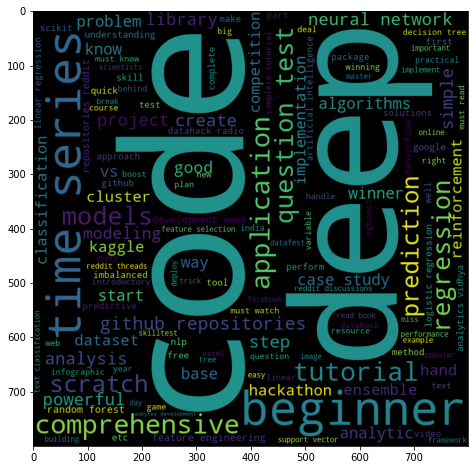

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8)) 
ax.imshow(wordcloud)
None

## Scatter plot using t-SNE

In [15]:
t = 'regression classification clustered cluster clustering'
' '.join([tok.lemma_ for tok in spacy_instance(t)])

'regression classification cluster cluster clustering'

In [ ]:
patterns = [('regression.*', 'regress'), ('classif.*', 'classify'), ('cluster.*', 'cluster')]
patterns = [(re.compile(pair[0], re.IGNORECASE), pair[1]) for pairs in patterns]

In [18]:
patterns = [('regression.*', 'regress'), ('classif.*', 'classify'), ('cluster.*', 'cluster')]
patterns = [(re.compile(pair[0], re.IGNORECASE), pair[1]) for pair in patterns]

def scatter(data, ng):
  lemmas = data['title'].map(lambda title: ' '.join([tok.lemma_ for tok in spacy_instance(title)]))
  for pattern in patterns:
    lemmas = lemmas.map(lambda s: re.sub(pattern[0], pattern[1], s))
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, ng)).fit(lemmas)
  tfidf = vectorizer.transform(data['title'])
  tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
  data['tsne_x'] = tsne_xy[:, 0]
  data['tsne_y'] = tsne_xy[:, 1]
  color_map = {'regression': 'red', 'classification': 'green', 'clustering': 'blue'}
  def color_selector(t):
    if 'regression' in t:
      return 'red'
    elif 'classification' in t:
      return 'green'
    elif 'clustering' in t:
      return 'blue'
    else:
      return 'gray'
  colors = data['title'].str.lower().map(color_selector).values
  ax = data.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)
  ax.set_title('NGram-Range: 1-%d' % ng)

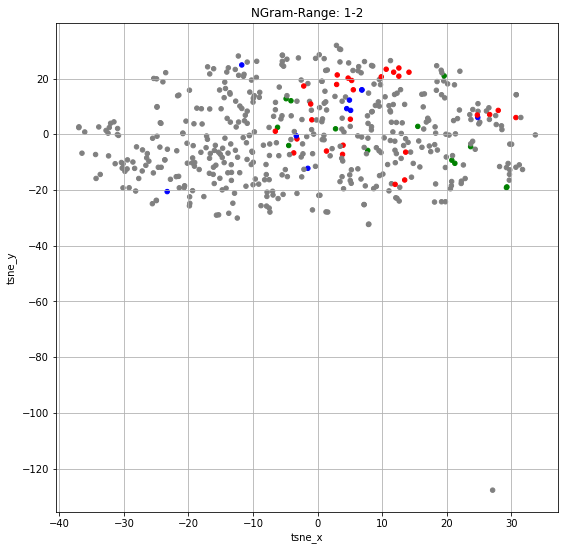

In [19]:
scatter(df2, 2)

In [20]:
df2.query("tsne_y < -120")

,Unnamed: 0,datetime,author,author_url,title,url,summary,page_no,tsne_x,tsne_y
63,63,2020-09-16T17:33:43+05:30,Guest Blog,https://www.analyticsvidhya.com/blog/author/gu...,Machine Learning in Cyber Security — Malicious...,https://www.analyticsvidhya.com/blog/2020/09/m...,Introduction Monitoring of user activities per...,5,27.108156,-127.772209


## Check vocabulary

In [ ]:
print(vectorizer.vocabulary_)
pd.Series(vectorizer.vocabulary_).to_csv('features.csv')

## Remove unpublished records

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).fit(df3['title'])
print(len(vectorizer.vocabulary_))
#print(vectorizer.vocabulary_)
tfidf = vectorizer.transform(df3['title'])

In [ ]:
tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
df3['tsne_x'] = tsne_xy[:, 0]
df3['tsne_y'] = tsne_xy[:, 1]

In [ ]:
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True)

In [ ]:
colors = df3['title'].str.lower().map(lambda t: 'red' if 'regression' in t else 'green').values
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)

In [ ]:
for t in df_valid[df_valid['title'].str.lower().map(lambda t: 'classification' in t)]['title']:
  print(t)